In [40]:
import pandas as pd
import csv
import io
import boto3
import sys
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.stats import spearmanr



In [ ]:
# Replace with your actual bucket name and file paths
bucket_name = "your-s3-bucket-name"
file_keys = [
    "path/to/proteingym/file1.csv",
    "path/to/proteingym/file2.csv",
    # Add more files here
]

output_row_counts_path = "path/to/row_counts.csv"
semisup_results_path = "path/to/Results/semisupervised_results/onehot_120M_allyears_ridge.csv"

In [ ]:
# Dictionary to store row counts
row_counts = {}

# Loop through files
for key in tqdm(file_keys):
    obj = s3.get_object(Bucket=bucket_name, Key=key)
    body = obj['Body'].read()
    df = pd.read_csv(io.BytesIO(body))
    row_counts[key] = len(df)
    print(f"{key}: {len(df)} rows")

# Save to CSV
with open(output_row_counts_path, "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["file_name", "num_rows"])
    for key, count in row_counts.items():
        writer.writerow([key, count])

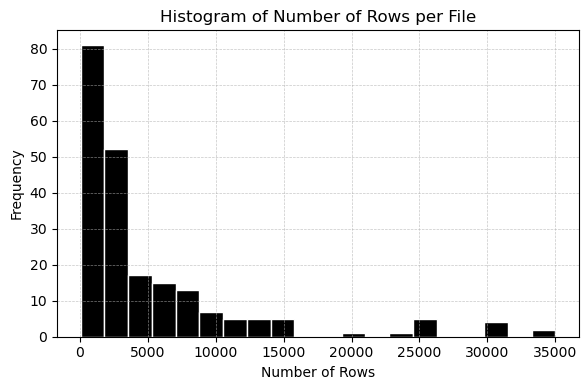

In [43]:
df = pd.read_csv(output_row_counts_path)
# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(df["num_rows"], bins=20, color="black", edgecolor="white")  # B&W style
plt.xlabel("Number of Rows")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Rows per File")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
# now look how the spearman changes with respect to dataset size after semi-sup learning

semisup = pd.read_csv(semisup_results_path)
semisup

,file,10%_train_onehot,20%_train_onehot,30%_train_onehot,40%_train_onehot,50%_train_onehot,60%_train_onehot,70%_train_onehot,80%_train_onehot,90%_train_onehot,...,90%_train_2023,10%_train_2024,20%_train_2024,30%_train_2024,40%_train_2024,50%_train_2024,60%_train_2024,70%_train_2024,80%_train_2024,90%_train_2024
0,A0A192B1T2_9HIV1_Haddox_2018_with_scoresandemb...,0.669929,0.750964,0.774769,0.785666,0.792657,0.794377,0.801352,0.805189,0.802668,...,0.724070,0.616821,0.664655,0.677615,0.689228,0.700602,0.703157,0.701950,0.710048,0.711033
1,A0A1I9GEU1_NEIME_Kennouche_2019_with_scoresand...,0.042309,0.067198,0.095118,0.071000,0.082663,0.057563,0.049973,0.147601,0.032153,...,-0.107558,0.000853,0.028311,0.026537,-0.016073,0.035842,0.047798,0.071781,0.076646,0.007771
2,A0A247D711_LISMN_Stadelmann_2021_with_scoresan...,0.477779,0.565295,0.574489,0.594134,0.621806,0.608434,0.618002,0.605348,0.633886,...,0.527402,0.307377,0.376914,0.428478,0.457646,0.487536,0.484012,0.532573,0.495921,0.533597
3,A0A2Z5U3Z0_9INFA_Doud_2016_with_scoresandembed...,0.594707,0.686718,0.712502,0.726889,0.736648,0.739745,0.751684,0.742273,0.747525,...,0.686306,0.545677,0.614497,0.641178,0.654147,0.665202,0.670158,0.681969,0.678576,0.680848
4,A0A2Z5U3Z0_9INFA_Wu_2014_with_scoresandembeddi...,0.123674,0.172246,0.219912,0.234889,0.272817,0.309246,0.332584,0.330112,0.346749,...,0.320531,0.167462,0.183223,0.238291,0.209026,0.232749,0.272251,0.295662,0.280632,0.254088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,VKOR1_HUMAN_Chiasson_2020_activity_with_scores...,0.127651,0.164233,0.196151,0.241330,0.247236,0.221547,0.251638,0.279157,0.317434,...,0.245107,0.168642,0.191862,0.165674,0.211539,0.245762,0.300951,0.267626,0.298421,0.254236
207,VRPI_BPT7_Tsuboyama_2023_2WNM_with_scoresandem...,0.598722,0.656158,0.705785,0.721380,0.724458,0.736505,0.717994,0.691318,0.717126,...,0.808370,0.658065,0.713851,0.724851,0.720824,0.748094,0.753134,0.750093,0.740273,0.764987
208,YAIA_ECOLI_Tsuboyama_2023_2KVT_with_scoresande...,0.790076,0.839137,0.867027,0.876945,0.879951,0.882813,0.886515,0.895332,0.876131,...,0.873666,0.729259,0.785400,0.803623,0.837118,0.847746,0.862808,0.882869,0.885630,0.886043
209,YAP1_HUMAN_Araya_2012_with_scoresandembeddings...,0.706035,0.749195,0.756944,0.770461,0.778509,0.778835,0.782044,0.788799,0.792655,...,0.760117,0.643038,0.680603,0.705279,0.714474,0.726118,0.729174,0.731656,0.742574,0.743331


In [45]:
df["file_name"] = df["file_name"].str.split("/").str[-1]

#Remove suffixes from DMS_ID Column so it can be merged
df["DMS_ID"] = df["file_name"].str.replace("_with_scoresandembeddings.csv", "", regex=False)
semisup["DMS_ID"] = semisup["file"].str.replace("_with_scoresandembeddings_allyears.csv", "", regex=False)

merged_df = df.merge(semisup, on="DMS_ID", how="inner")


===== 10% Training =====
  2011: Spearman ρ = 0.142, p = 0.0391
  2012: Spearman ρ = 0.169, p = 0.0139
  2013: Spearman ρ = 0.139, p = 0.044
  2014: Spearman ρ = 0.162, p = 0.0188
  2015: Spearman ρ = 0.145, p = 0.0355
  2016: Spearman ρ = 0.131, p = 0.058
  2017: Spearman ρ = 0.157, p = 0.0228
  2018: Spearman ρ = 0.150, p = 0.029
  2019: Spearman ρ = 0.148, p = 0.0312
  2020: Spearman ρ = 0.132, p = 0.0553
  2021: Spearman ρ = 0.149, p = 0.0309
  2022: Spearman ρ = 0.132, p = 0.056
  2023: Spearman ρ = 0.145, p = 0.0357
  2024: Spearman ρ = 0.134, p = 0.0515
  onehot: Spearman ρ = 0.229, p = 0.000797


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


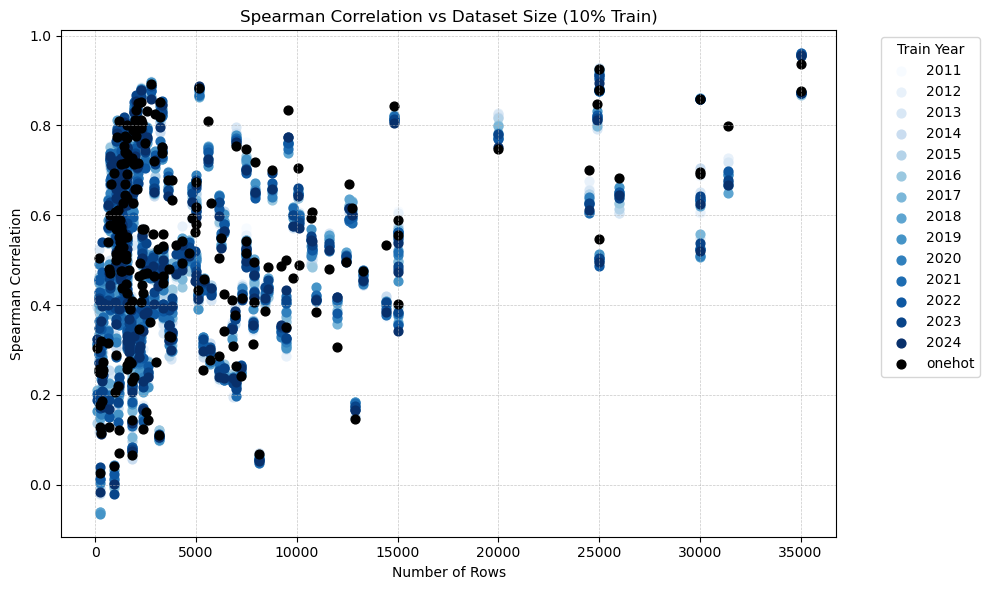


===== 20% Training =====
  2011: Spearman ρ = 0.111, p = 0.108
  2012: Spearman ρ = 0.132, p = 0.0555
  2013: Spearman ρ = 0.118, p = 0.0879
  2014: Spearman ρ = 0.116, p = 0.0934
  2015: Spearman ρ = 0.122, p = 0.0781
  2016: Spearman ρ = 0.106, p = 0.125
  2017: Spearman ρ = 0.130, p = 0.0595
  2018: Spearman ρ = 0.113, p = 0.102
  2019: Spearman ρ = 0.125, p = 0.069
  2020: Spearman ρ = 0.104, p = 0.132
  2021: Spearman ρ = 0.102, p = 0.141
  2022: Spearman ρ = 0.097, p = 0.162
  2023: Spearman ρ = 0.100, p = 0.147
  2024: Spearman ρ = 0.089, p = 0.199
  onehot: Spearman ρ = 0.224, p = 0.00108


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


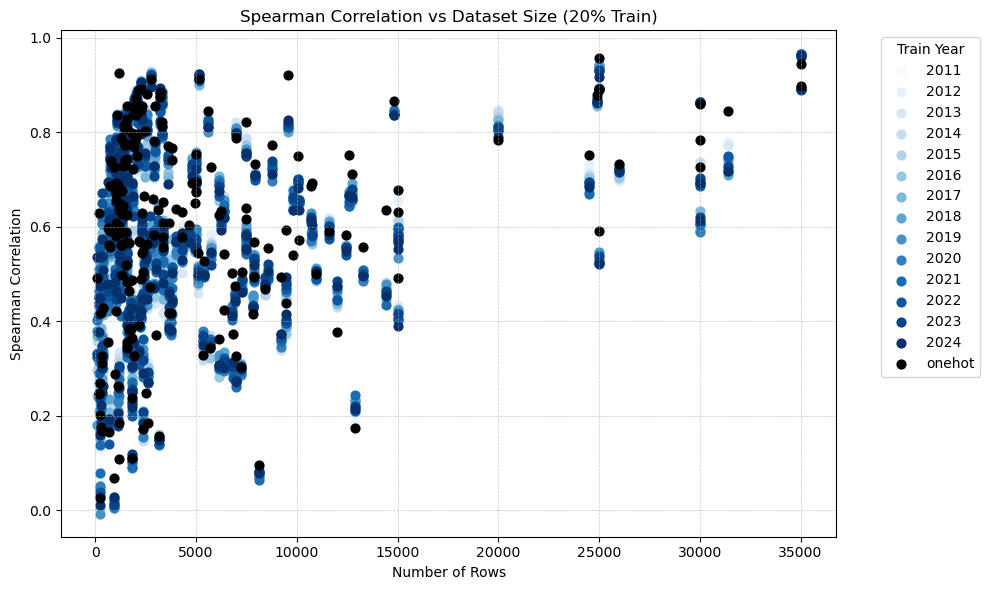


===== 30% Training =====
  2011: Spearman ρ = 0.095, p = 0.168
  2012: Spearman ρ = 0.124, p = 0.0724
  2013: Spearman ρ = 0.099, p = 0.152
  2014: Spearman ρ = 0.098, p = 0.156
  2015: Spearman ρ = 0.105, p = 0.127
  2016: Spearman ρ = 0.087, p = 0.21
  2017: Spearman ρ = 0.109, p = 0.113
  2018: Spearman ρ = 0.101, p = 0.143
  2019: Spearman ρ = 0.100, p = 0.148
  2020: Spearman ρ = 0.084, p = 0.227
  2021: Spearman ρ = 0.094, p = 0.176
  2022: Spearman ρ = 0.086, p = 0.213
  2023: Spearman ρ = 0.094, p = 0.175
  2024: Spearman ρ = 0.082, p = 0.236
  onehot: Spearman ρ = 0.188, p = 0.00628


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


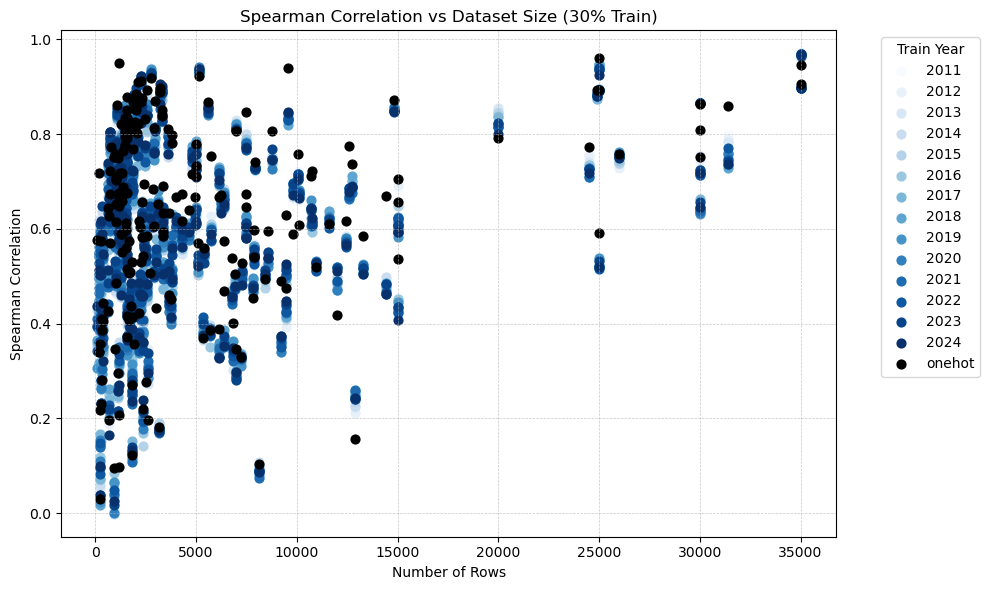


===== 40% Training =====
  2011: Spearman ρ = 0.090, p = 0.192
  2012: Spearman ρ = 0.106, p = 0.125
  2013: Spearman ρ = 0.084, p = 0.226
  2014: Spearman ρ = 0.090, p = 0.192
  2015: Spearman ρ = 0.088, p = 0.204
  2016: Spearman ρ = 0.081, p = 0.243
  2017: Spearman ρ = 0.099, p = 0.152
  2018: Spearman ρ = 0.076, p = 0.275
  2019: Spearman ρ = 0.090, p = 0.194
  2020: Spearman ρ = 0.068, p = 0.323
  2021: Spearman ρ = 0.083, p = 0.23
  2022: Spearman ρ = 0.074, p = 0.284
  2023: Spearman ρ = 0.078, p = 0.257
  2024: Spearman ρ = 0.066, p = 0.34
  onehot: Spearman ρ = 0.185, p = 0.00717


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


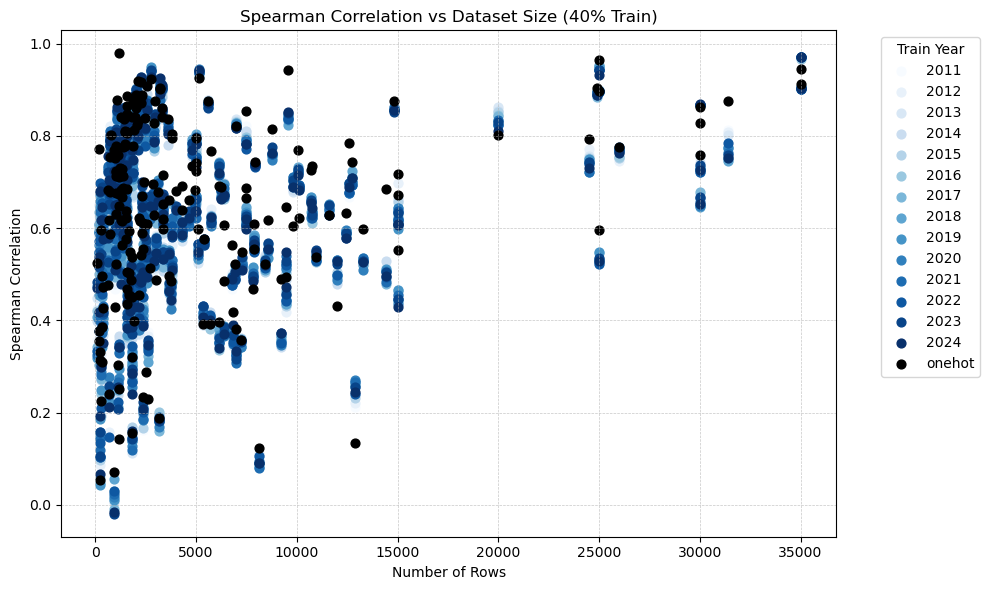


===== 50% Training =====
  2011: Spearman ρ = 0.081, p = 0.243
  2012: Spearman ρ = 0.093, p = 0.178
  2013: Spearman ρ = 0.077, p = 0.265
  2014: Spearman ρ = 0.079, p = 0.25
  2015: Spearman ρ = 0.087, p = 0.21
  2016: Spearman ρ = 0.073, p = 0.289
  2017: Spearman ρ = 0.084, p = 0.222
  2018: Spearman ρ = 0.074, p = 0.284
  2019: Spearman ρ = 0.072, p = 0.297
  2020: Spearman ρ = 0.043, p = 0.533
  2021: Spearman ρ = 0.073, p = 0.292
  2022: Spearman ρ = 0.061, p = 0.378
  2023: Spearman ρ = 0.064, p = 0.356
  2024: Spearman ρ = 0.037, p = 0.588
  onehot: Spearman ρ = 0.184, p = 0.00746


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


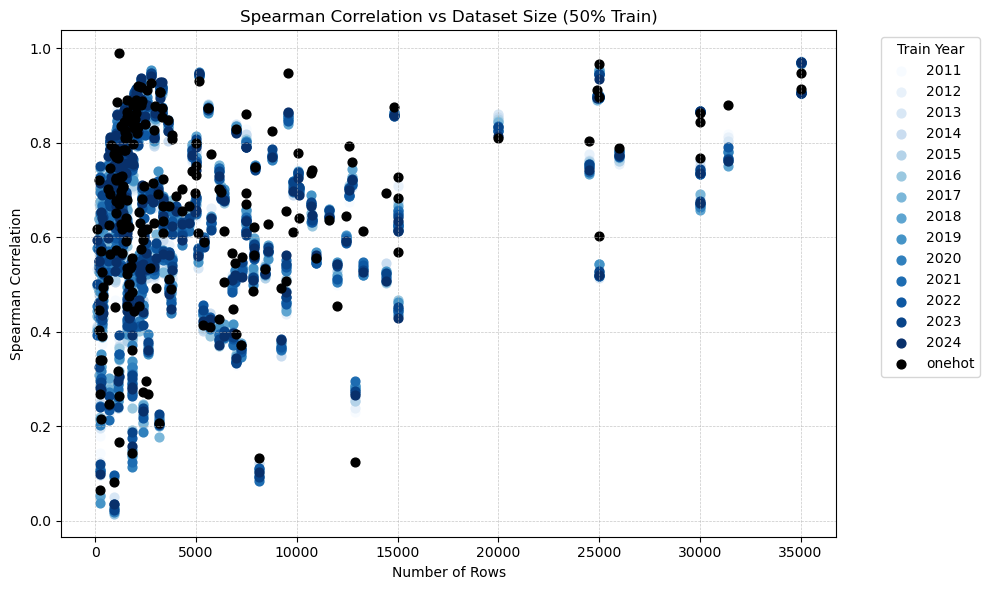


===== 60% Training =====
  2011: Spearman ρ = 0.063, p = 0.366
  2012: Spearman ρ = 0.068, p = 0.326
  2013: Spearman ρ = 0.058, p = 0.4
  2014: Spearman ρ = 0.058, p = 0.398
  2015: Spearman ρ = 0.079, p = 0.255
  2016: Spearman ρ = 0.043, p = 0.539
  2017: Spearman ρ = 0.073, p = 0.292
  2018: Spearman ρ = 0.057, p = 0.409
  2019: Spearman ρ = 0.054, p = 0.438
  2020: Spearman ρ = 0.036, p = 0.607
  2021: Spearman ρ = 0.049, p = 0.478
  2022: Spearman ρ = 0.041, p = 0.553
  2023: Spearman ρ = 0.045, p = 0.514
  2024: Spearman ρ = 0.028, p = 0.687
  onehot: Spearman ρ = 0.165, p = 0.0167


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


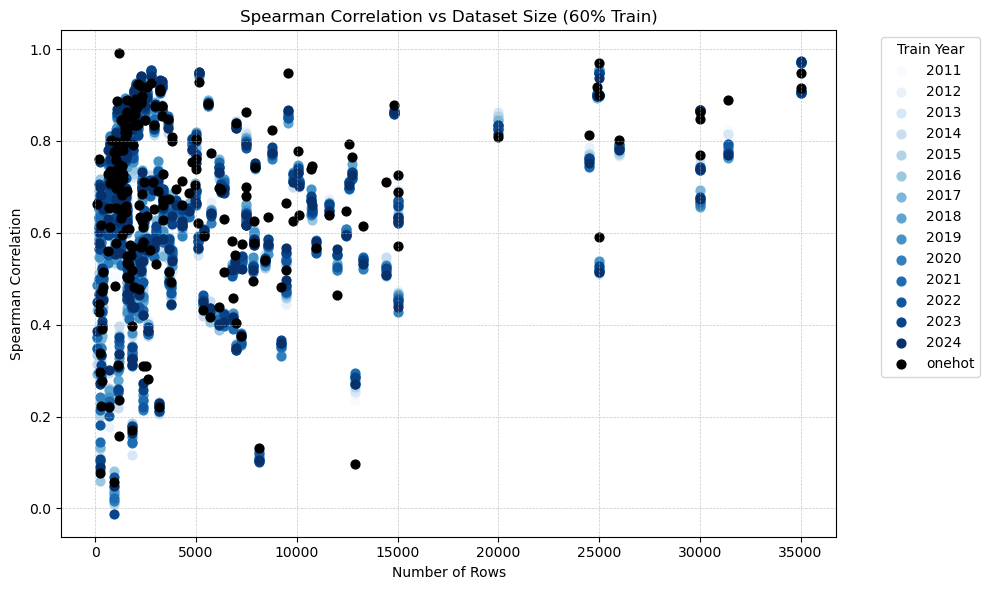


===== 70% Training =====
  2011: Spearman ρ = 0.031, p = 0.657
  2012: Spearman ρ = 0.040, p = 0.56
  2013: Spearman ρ = 0.039, p = 0.577
  2014: Spearman ρ = 0.039, p = 0.575
  2015: Spearman ρ = 0.041, p = 0.555
  2016: Spearman ρ = 0.019, p = 0.78
  2017: Spearman ρ = 0.046, p = 0.509
  2018: Spearman ρ = 0.028, p = 0.683
  2019: Spearman ρ = 0.033, p = 0.634
  2020: Spearman ρ = 0.007, p = 0.918
  2021: Spearman ρ = 0.024, p = 0.727
  2022: Spearman ρ = 0.019, p = 0.789
  2023: Spearman ρ = 0.019, p = 0.787
  2024: Spearman ρ = 0.012, p = 0.859
  onehot: Spearman ρ = 0.175, p = 0.011


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


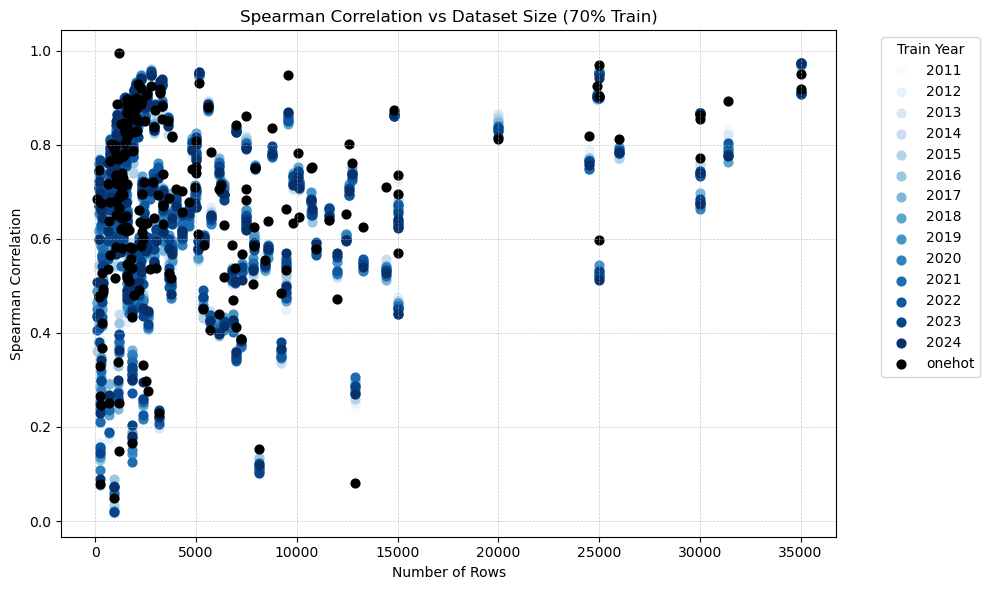


===== 80% Training =====
  2011: Spearman ρ = 0.029, p = 0.672
  2012: Spearman ρ = 0.032, p = 0.648
  2013: Spearman ρ = 0.018, p = 0.79
  2014: Spearman ρ = 0.031, p = 0.654
  2015: Spearman ρ = 0.027, p = 0.699
  2016: Spearman ρ = 0.007, p = 0.917
  2017: Spearman ρ = 0.031, p = 0.659
  2018: Spearman ρ = 0.023, p = 0.736
  2019: Spearman ρ = 0.026, p = 0.708
  2020: Spearman ρ = 0.010, p = 0.883
  2021: Spearman ρ = 0.016, p = 0.822
  2022: Spearman ρ = 0.007, p = 0.92
  2023: Spearman ρ = 0.011, p = 0.868
  2024: Spearman ρ = 0.001, p = 0.99
  onehot: Spearman ρ = 0.185, p = 0.0072


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


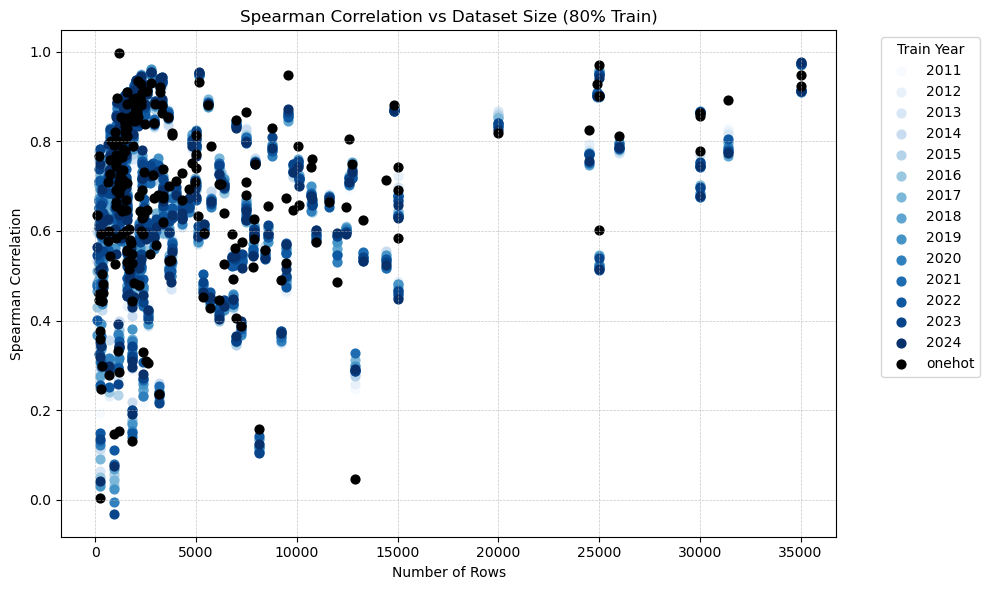


===== 90% Training =====
  2011: Spearman ρ = 0.014, p = 0.842
  2012: Spearman ρ = 0.024, p = 0.727
  2013: Spearman ρ = -0.002, p = 0.976
  2014: Spearman ρ = 0.010, p = 0.888
  2015: Spearman ρ = 0.008, p = 0.908
  2016: Spearman ρ = 0.001, p = 0.983
  2017: Spearman ρ = 0.009, p = 0.891
  2018: Spearman ρ = -0.008, p = 0.909
  2019: Spearman ρ = -0.007, p = 0.923
  2020: Spearman ρ = -0.012, p = 0.863
  2021: Spearman ρ = -0.007, p = 0.918
  2022: Spearman ρ = -0.026, p = 0.712
  2023: Spearman ρ = -0.005, p = 0.938
  2024: Spearman ρ = -0.018, p = 0.795
  onehot: Spearman ρ = 0.166, p = 0.0156


/tmp/ipykernel_1403/1450633548.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues", len(years))


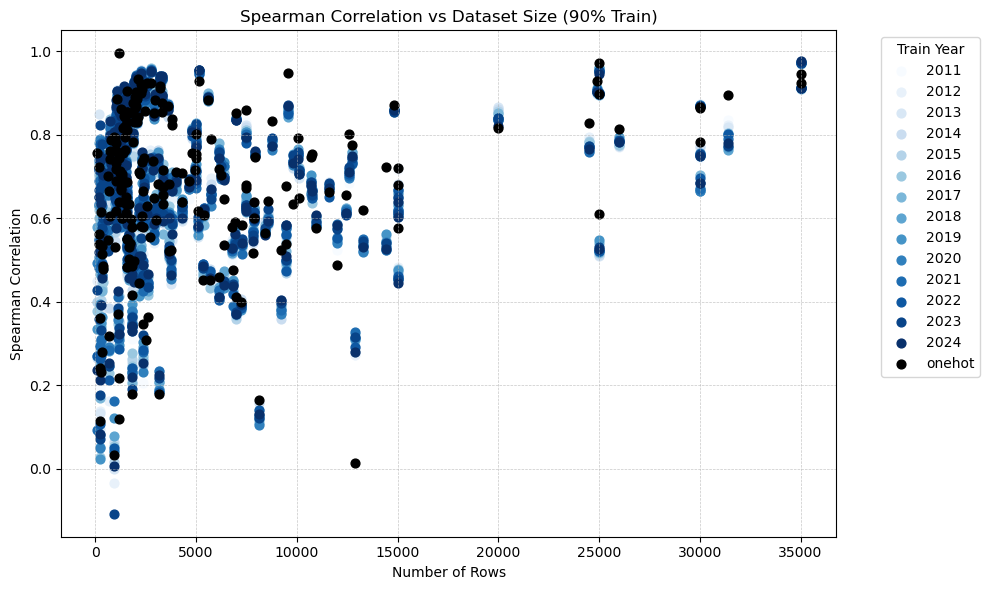

In [46]:
# Loop through each percent
for pct in percents:
    print(f"\n===== {pct}% Training =====")
    
    prefix = f"{pct}%_train_"
    year_cols = [prefix + year for year in years]
    onehot_col = prefix + "onehot"

    required_cols = year_cols + [onehot_col]
    available_cols = [col for col in required_cols if col in merged_df.columns]
    if len(available_cols) < len(required_cols):
        print(f"Skipping {pct}%: missing columns")
        continue

    # Melt for plotting
    long_df = merged_df.melt(id_vars="num_rows", value_vars=required_cols,
                             var_name="Year", value_name="Spearman")

    long_df["IsOneHot"] = long_df["Year"] == onehot_col
    long_df["YearLabel"] = long_df["Year"].str.extract(r"(\d{4})")
    long_df.loc[long_df["IsOneHot"], "YearLabel"] = "onehot"

    # Compute Spearman correlations and print them
    for year_label, group in long_df.groupby("YearLabel"):
        rho, pval = spearmanr(group["num_rows"], group["Spearman"], nan_policy='omit')
        print(f"  {year_label}: Spearman ρ = {rho:.3f}, p = {pval:.3g}")

    # Optional: plot
    plt.figure(figsize=(10, 6))
    cmap = cm.get_cmap("Blues", len(years))
    color_dict = {year: cmap(i) for i, year in enumerate(years)}
    color_dict["onehot"] = "black"
    
    for year_label, group in long_df.groupby("YearLabel"):
        plt.scatter(group["num_rows"], group["Spearman"],
                    label=year_label,
                    color=color_dict[year_label],
                    s=40)

    plt.xlabel("Number of Rows")
    plt.ylabel("Spearman Correlation")
    plt.title(f"Spearman Correlation vs Dataset Size ({pct}% Train)")
    plt.legend(title="Train Year", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()